### What Is the Most Optmal Skills To learn For Data Analyst?
#### Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill in demand
3. Determine if certain technologies are more prevalent.

In [36]:
# Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Hide error message
from IPython.display import display
display()

# Cleaning the Data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # converting to the right time value
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills) # converting job_skills to a list

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ekene\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Jan  1 18:32:26 2025).


In [37]:
# Filter for Data Analyst jobs in UK
df_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Analyst')].copy()
df_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"[sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
170,Data Analyst,Projects & Solutions Data Analyst (UK Pensions),"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-04 13:35:45,False,False,United Kingdom,None,NaN,NaN,Aon,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
206,Data Analyst,Business Intelligence / Data Analyst,United Kingdom,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,NaN,Michael Page Technology,[tableau],{'analyst_tools': ['tableau']}
218,Data Analyst,Data and Strategy Analyst | Customer Success,United Kingdom,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,NaN,DeepL SE,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784610,Data Analyst,Data Analyst,United Kingdom,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-21 06:40:29,True,False,United Kingdom,None,NaN,NaN,Totaljobs Group,[excel],{'analyst_tools': ['excel']}
784707,Data Analyst,Forensic Data Analyst,United Kingdom,via Forensic.jobs,Full-time,False,United Kingdom,2023-10-11 06:11:04,True,False,United Kingdom,None,NaN,NaN,Premier Group Recruitment,None,None
784999,Data Analyst,HR Data Analyst,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-23 06:14:46,True,False,United Kingdom,None,NaN,NaN,Sainsbury's,None,None
785061,Data Analyst,Data Analyst,"Manchester, UK",via LinkedIn,Contractor,False,United Kingdom,2023-11-23 06:17:48,True,False,United Kingdom,None,NaN,NaN,Quooker UK,None,None


In [38]:
df_UK = df_UK.dropna(subset= ['salary_year_avg'])
df_UK_exploded = df_UK.explode('job_skills')
df_UK_exploded[['salary_year_avg','job_skills' ]]

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter
...,...,...
771595,111175.0,sql
771595,111175.0,excel
771595,111175.0,sheets
771595,111175.0,looker


In [39]:
DA_UK_skills = df_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False)
DA_UK_skills = DA_UK_skills.rename(columns={'count' : 'skills_count', 'median': 'median_salary'})

da_job_count = len(df_UK)

DA_UK_skills['skills_percent'] = DA_UK_skills['skills_count']/ da_job_count *100


skills_percent = 5

df_skill_high_demand = DA_UK_skills[DA_UK_skills['skills_percent'] > skills_percent]

df_skill_high_demand

,skills_count,median_salary,skills_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
outlook,6,53857.0,8.333333


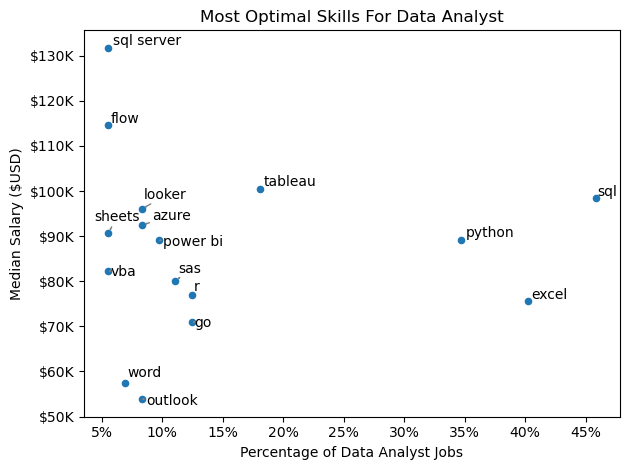

In [43]:
df_skill_high_demand.plot(kind= 'scatter', x= 'skills_percent', y= 'median_salary')

texts = []
plt.xlabel('Percentage of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title ('Most Optimal Skills For Data Analyst')
# for labelling...
for i,txt in enumerate(df_skill_high_demand.index):
    texts.append(plt.text(df_skill_high_demand['skills_percent'].iloc[i], df_skill_high_demand['median_salary'].iloc[i], txt ))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color = 'grey', lw= 1))

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax= 100, decimals=0))

plt.tight_layout()
plt.show()

### Grouping skills by technology

In [40]:
df_technology= df['job_type_skills'].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove nan values
df_technology = df_technology.dropna()

#Combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert strings to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exist in technology_dict add value to existing dictionary
            technology_dict[key] += value
        else:                      # if key does not does not exist in technology_dict and value
            technology_dict[key] = value

# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value)) 

technology_dict               


{'analyst_tools': ['qlik',
  'excel',
  'dax',
  'sap',
  'nuix',
  'spreadsheet',
  'word',
  'ssrs',
  'splunk',
  'power bi',
  'tableau',
  'esquisse',
  'alteryx',
  'visio',
  'msaccess',
  'looker',
  'sas',
  'ssis',
  'spss',
  'microstrategy',
  'powerpoint',
  'sharepoint',
  'datarobot',
  'outlook',
  'ms access',
  'powerbi',
  'cognos',
  'sheets'],
 'programming': ['mongodb',
  'groovy',
  'shell',
  'no-sql',
  'dart',
  'mongo',
  'scala',
  'c#',
  'sass',
  't-sql',
  'solidity',
  'go',
  'ocaml',
  'typescript',
  'matlab',
  'c',
  'lisp',
  'php',
  'nosql',
  'erlang',
  'pascal',
  'vba',
  'perl',
  'cobol',
  'haskell',
  'fortran',
  'vb.net',
  'golang',
  'css',
  'visualbasic',
  'delphi',
  'python',
  'r',
  'elixir',
  'f#',
  'bash',
  'sas',
  'swift',
  'lua',
  'assembly',
  'objective-c',
  'powershell',
  'julia',
  'kotlin',
  'crystal',
  'visual basic',
  'sql',
  'c++',
  'apl',
  'ruby',
  'rust',
  'java',
  'html',
  'clojure',
  'javascr

In [41]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns= ['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,qlik
0,analyst_tools,excel
0,analyst_tools,dax
0,analyst_tools,sap
0,analyst_tools,nuix
...,...,...
9,sync,rocketchat
9,sync,microsoft teams
9,sync,symphony
9,sync,slack


In [45]:
df_plot = df_skill_high_demand.merge(df_technology, left_on= 'job_skills', right_on= 'skills' )

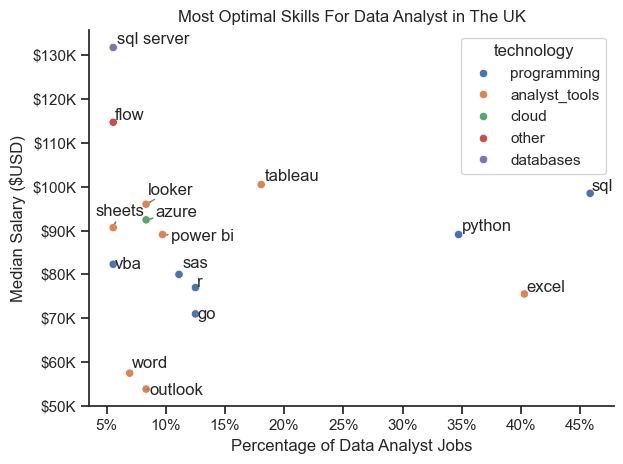

In [48]:
sns.scatterplot(
    x= 'skills_percent',
    y= 'median_salary',
    hue= 'technology',
    data= df_plot
)

sns.despine()
sns.set_theme(style='ticks')
texts = []
plt.xlabel('Percentage of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title ('Most Optimal Skills For Data Analyst in The UK')
# for labelling...
for i,txt in enumerate(df_skill_high_demand.index):
    texts.append(plt.text(df_skill_high_demand['skills_percent'].iloc[i], df_skill_high_demand['median_salary'].iloc[i], txt ))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color = 'grey', lw= 1))

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax= 100, decimals=0))

plt.tight_layout()
plt.show()